# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [30]:
df['data_ref_mesano'] = pd.to_datetime(df['data_ref']).dt.strftime('%m-%Y')
df['data_ref_mesano']

0        01-2015
1        01-2015
2        01-2015
3        01-2015
4        01-2015
          ...   
14995    03-2016
14996    03-2016
14997    03-2016
14998    03-2016
14999    03-2016
Name: data_ref_mesano, Length: 15000, dtype: object

**Posse de imóvel**

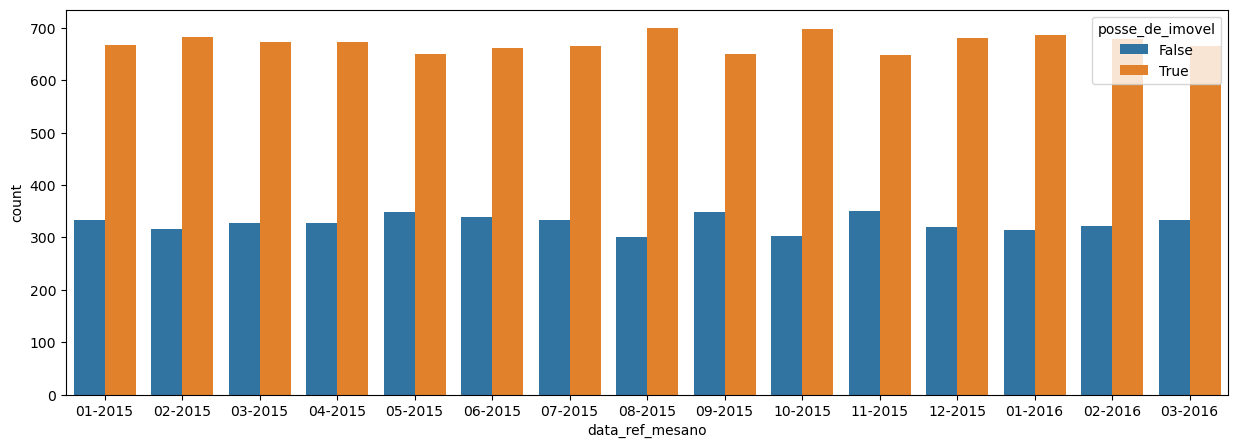

In [31]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='data_ref_mesano',  hue = 'posse_de_imovel', data=df)


In [33]:
tab = pd.crosstab(df['data_ref_mesano'],df['posse_de_imovel'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_imovel,False,True
data_ref_mesano,,
01-2015,0.333,0.667
01-2016,0.314,0.686
02-2015,0.317,0.683
02-2016,0.322,0.678
03-2015,0.327,0.673
03-2016,0.334,0.666
04-2015,0.327,0.673
05-2015,0.349,0.651
06-2015,0.339,0.661


**Posse de veículo**

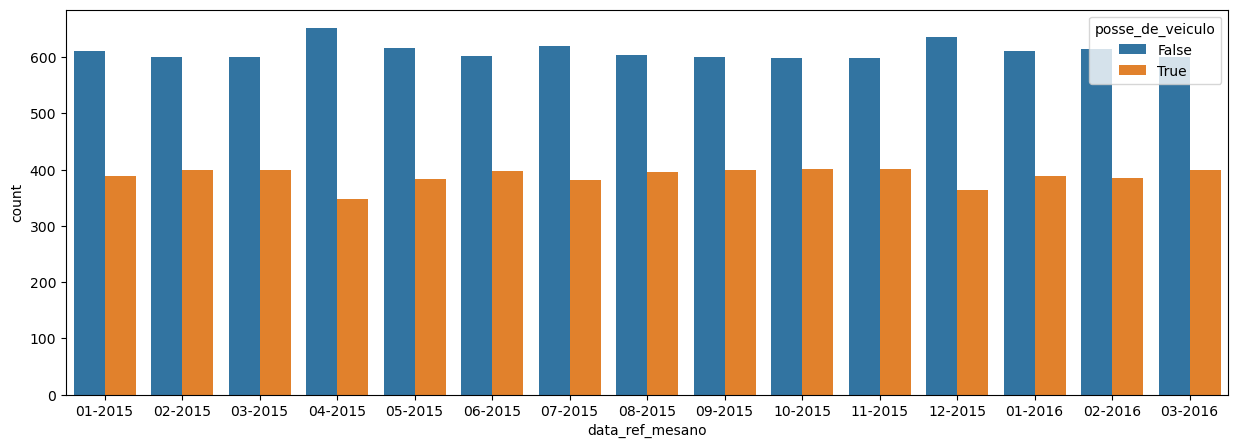

In [26]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='data_ref_mesano',  hue = 'posse_de_veiculo', data=df)

In [50]:
tab = pd.crosstab(df['data_ref_mesano'],df['posse_de_veiculo'])
tab.div(tab.sum(axis = 1), axis = 0)

posse_de_veiculo,False,True
data_ref_mesano,,
01-2015,0.611,0.389
01-2016,0.611,0.389
02-2015,0.600,0.400
02-2016,0.615,0.385
03-2015,0.601,0.399
03-2016,0.601,0.399
04-2015,0.652,0.348
05-2015,0.617,0.383
06-2015,0.602,0.398


    As variáveis permanecem estáveis ao longo do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\Cris\AppData\Local\Temp\ipykernel_11812\2542103529.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref_mesano", y="renda", hue = 'posse_de_imovel',


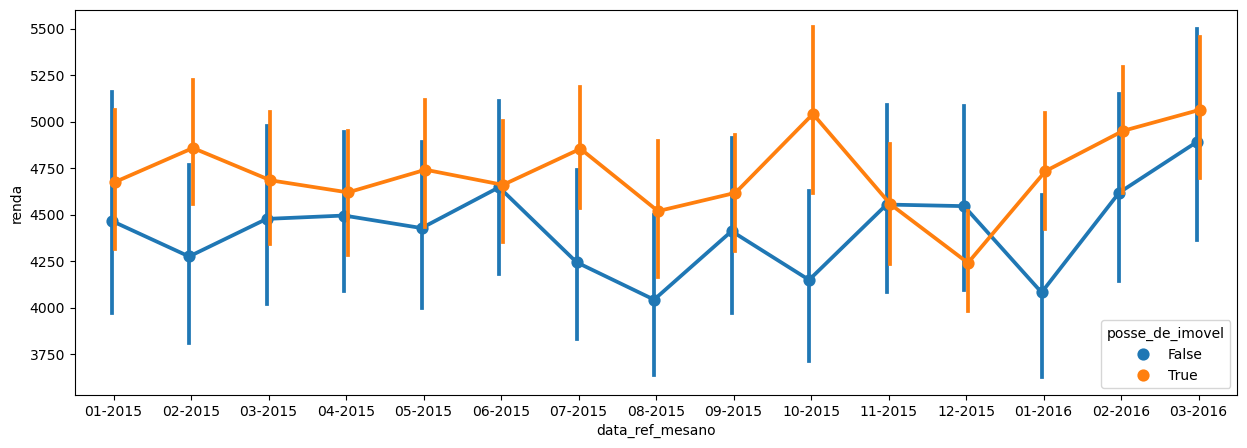

In [58]:
fig = plt.figure(figsize=(15,5))
ax = sns.pointplot(x="data_ref_mesano", y="renda", hue = 'posse_de_imovel',
                   data=df, dodge=True, ci = 95)


**Posse de imóvel**

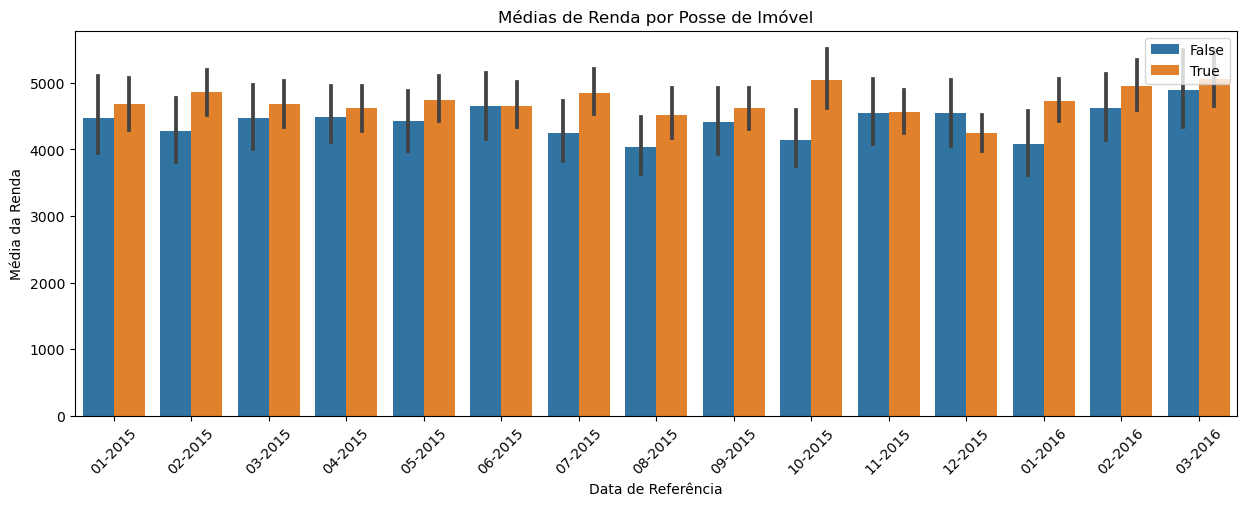

In [48]:
fig = plt.figure(figsize=(15,5))
_ = sns.barplot(x="data_ref_mesano", y='renda', hue = 'posse_de_imovel', data=df)

plt.title("Médias de Renda por Posse de Imóvel")
plt.xlabel("Data de Referência")
plt.ylabel("Média da Renda")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

**Posse de veículo**

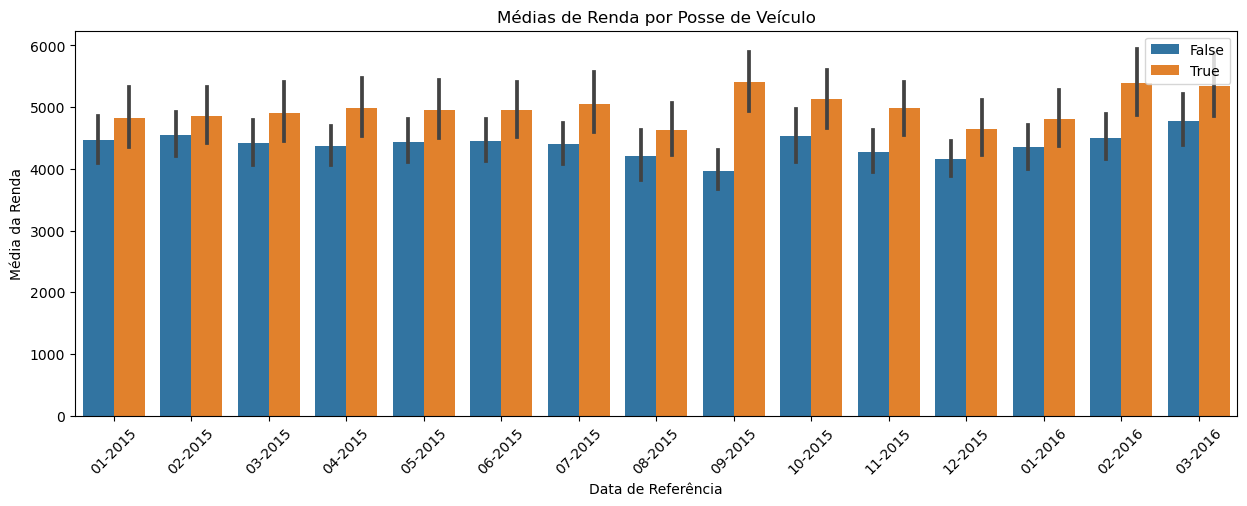

In [49]:
fig = plt.figure(figsize=(15,5))
_ = sns.barplot(x="data_ref_mesano", y='renda', hue = 'posse_de_veiculo', data=df)

plt.title("Médias de Renda por Posse de Veículo")
plt.xlabel("Data de Referência")
plt.ylabel("Média da Renda")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

    Entendo que as variáveis permanecem estáveis ao longo do tempo, não tendo oscilações expressivas ao longo do tempo.